In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

In [51]:
df = pd.read_csv('02-modern-renewable-energy-consumption.csv')

In [52]:
df.head(344)

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Argentina,ARG,1965,0.00000,0.000000,0.000000,1.225116
1,Argentina,ARG,1966,0.00000,0.000000,0.000000,1.240930
2,Argentina,ARG,1967,0.00000,0.000000,0.000000,1.270698
3,Argentina,ARG,1968,0.00000,0.000000,0.000000,1.497675
4,Argentina,ARG,1969,0.00000,0.000000,0.000000,1.343256
...,...,...,...,...,...,...,...
337,Venezuela,VEN,2017,0.01634,0.003960,0.095220,70.035480
338,Venezuela,VEN,2018,0.01634,0.003960,0.095220,58.150475
339,Venezuela,VEN,2019,0.04611,0.003080,0.083290,49.636760
340,Venezuela,VEN,2020,0.01110,0.003088,0.083518,61.277910


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   342 non-null    object 
 1   Code                     342 non-null    object 
 2   Year                     342 non-null    int64  
 3   Geo Biomass Other - TWh  342 non-null    float64
 4   Solar Generation - TWh   342 non-null    float64
 5   Wind Generation - TWh    342 non-null    float64
 6   Hydro Generation - TWh   342 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 18.8+ KB


In [54]:
df.describe()

,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1993.000000,2.941693,0.252626,1.294733,57.806723
std,16.476056,9.076053,1.434560,7.162248,94.404242
min,1965.000000,0.000000,0.000000,0.000000,1.225116
25%,1979.000000,0.012410,0.000000,0.000000,10.551750
50%,1993.000000,0.232500,0.000000,0.000000,22.403272
75%,2007.000000,1.469544,0.000000,0.036349,47.426250
max,2021.000000,58.741848,16.752281,72.285970,428.332920


In [55]:
df.columns

Index(['Entity', 'Code', 'Year', 'Geo Biomass Other - TWh',
       'Solar Generation - TWh', 'Wind Generation - TWh',
       'Hydro Generation - TWh'],
      dtype='object')

Text(0.5, 1.0, 'Entity_Count')

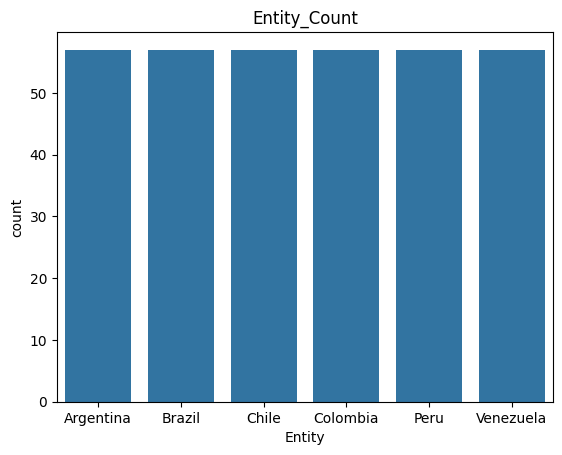

In [56]:
sns.countplot(x="Entity", data =df).set_title("Entity_Count")

<Axes: xlabel='Entity', ylabel='Solar Generation - TWh'>

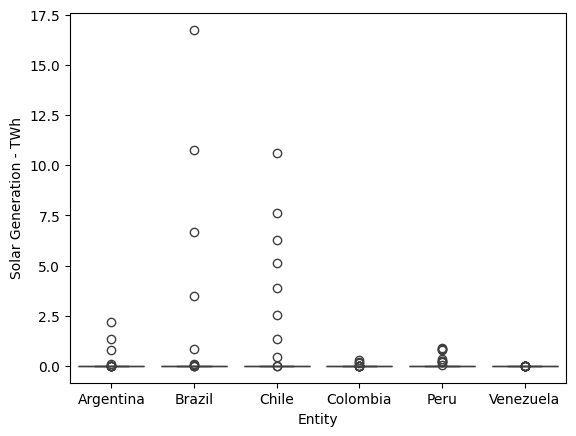

In [57]:
sns.boxplot(x="Entity", y = "Solar Generation - TWh" ,data =df)

<Axes: xlabel='count', ylabel='Entity'>

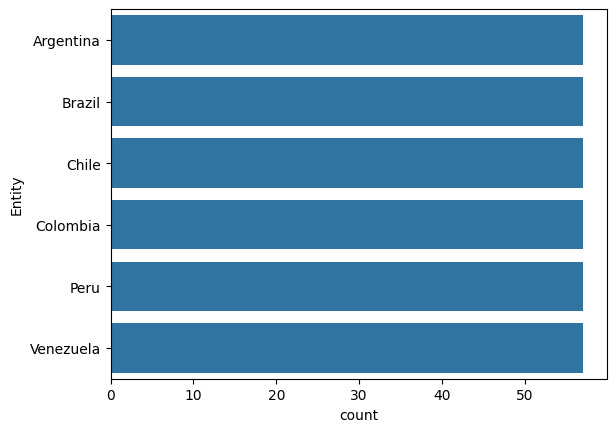

In [58]:
sns.countplot(y = 'Entity', data=df)

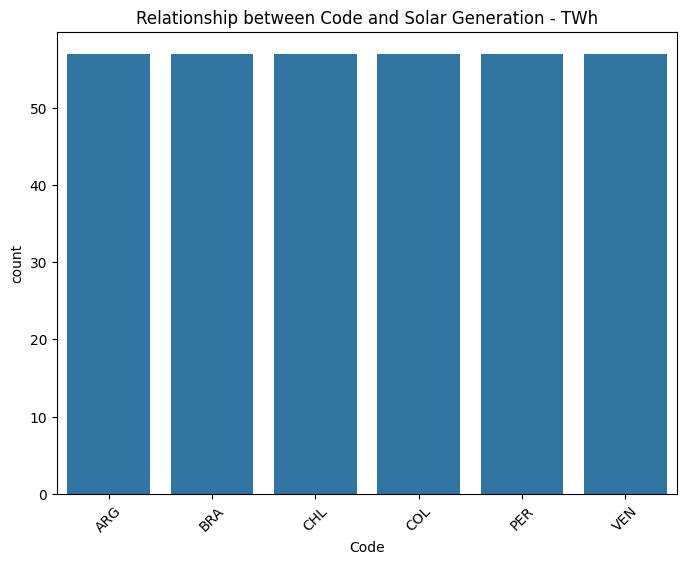

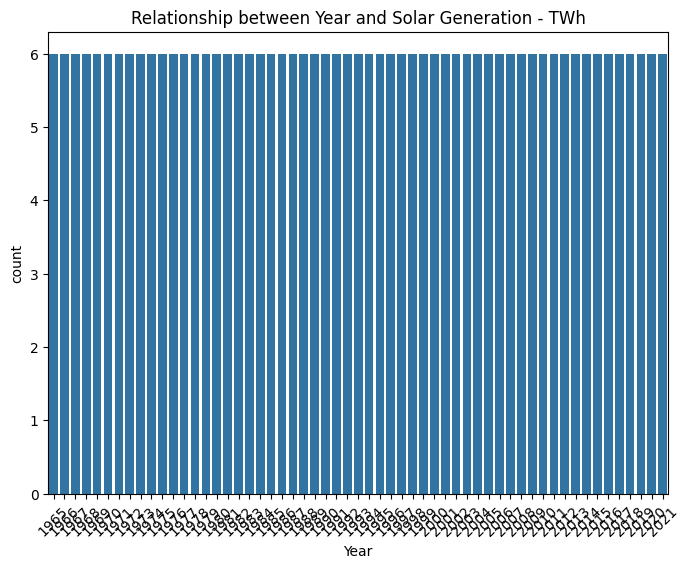

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['Code', 'Year']




for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Relationship between {col} and Solar Generation - TWh')
    plt.xticks(rotation=45)
    plt.show()

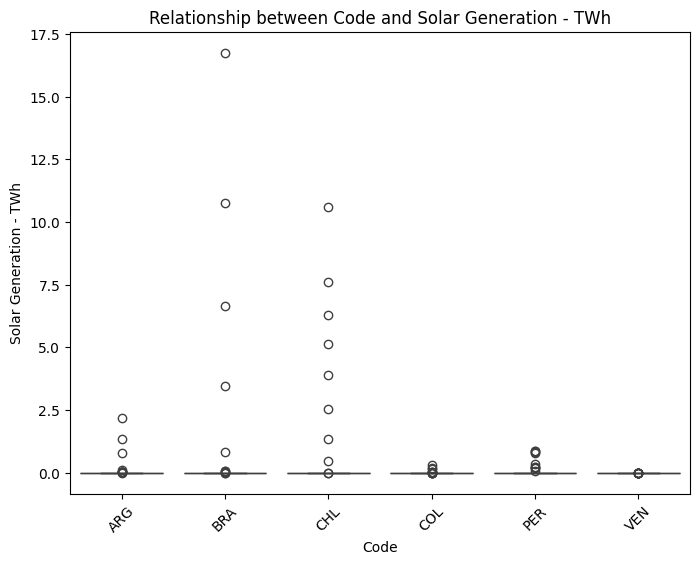

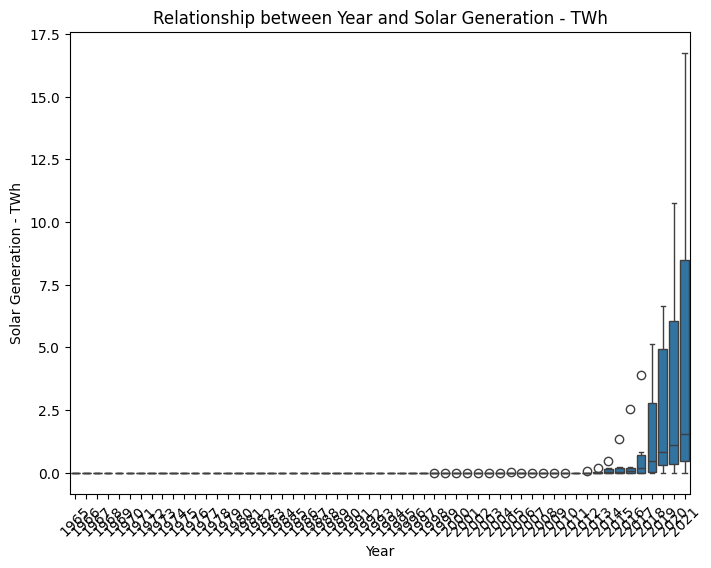

In [60]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col, y='Solar Generation - TWh')
    plt.title(f'Relationship between {col} and Solar Generation - TWh')
    plt.xticks(rotation=45)
    plt.show()

In [61]:
numerical_columns = ['Code', 'Year']

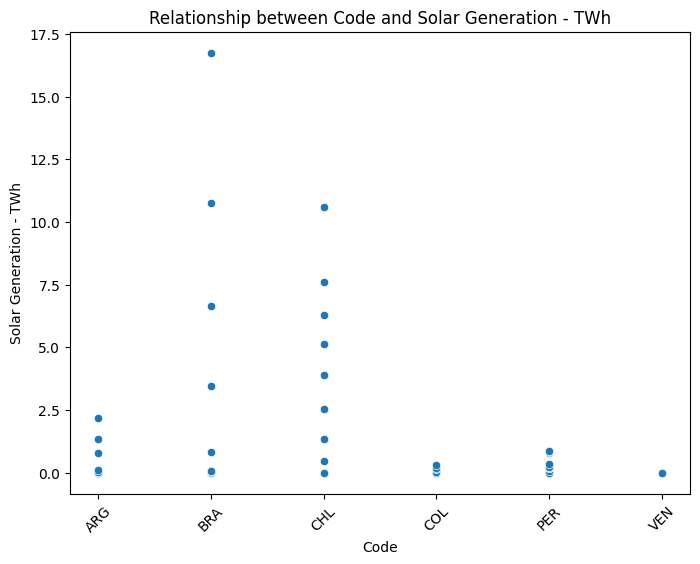

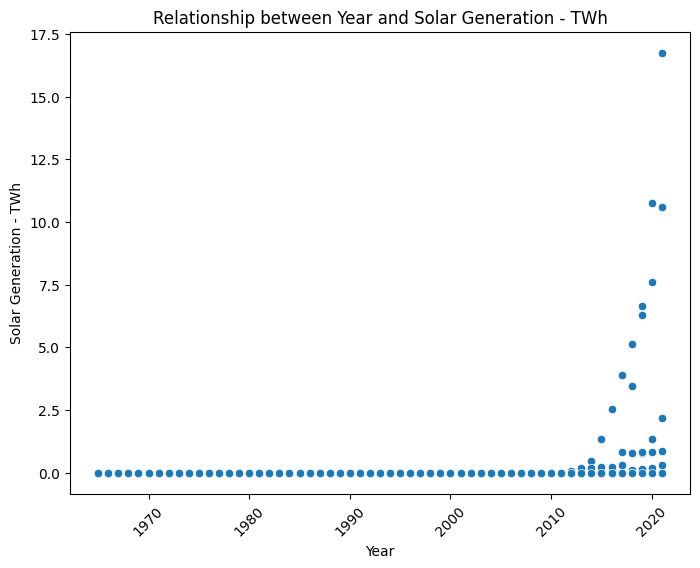

In [62]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Solar Generation - TWh')
    plt.title(f'Relationship between {col} and Solar Generation - TWh')
    plt.xticks(rotation=45)
    plt.show()

In [63]:
df.columns

Index(['Entity', 'Code', 'Year', 'Geo Biomass Other - TWh',
       'Solar Generation - TWh', 'Wind Generation - TWh',
       'Hydro Generation - TWh'],
      dtype='object')

In [64]:
columns = ['Entity', 'Solar Generation - TWh', 'Year']
columns = df[columns]

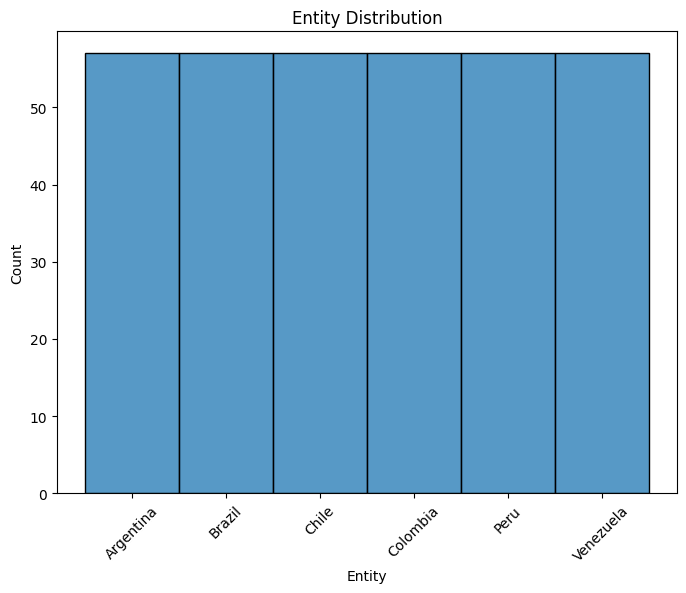

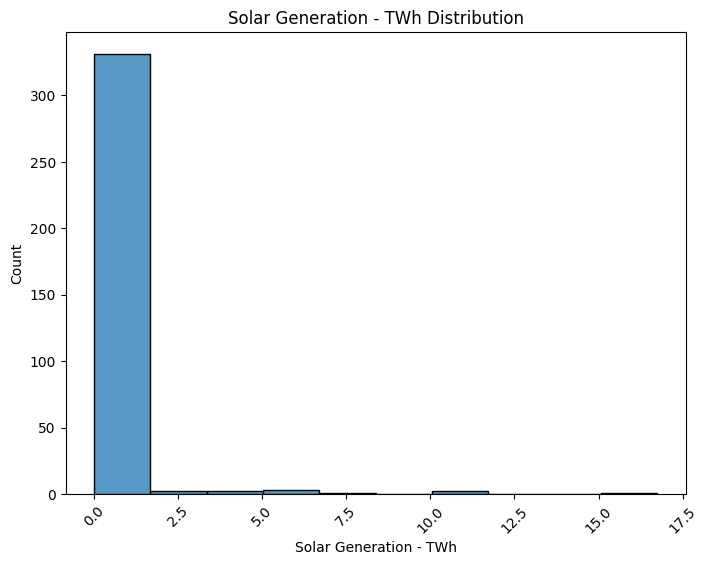

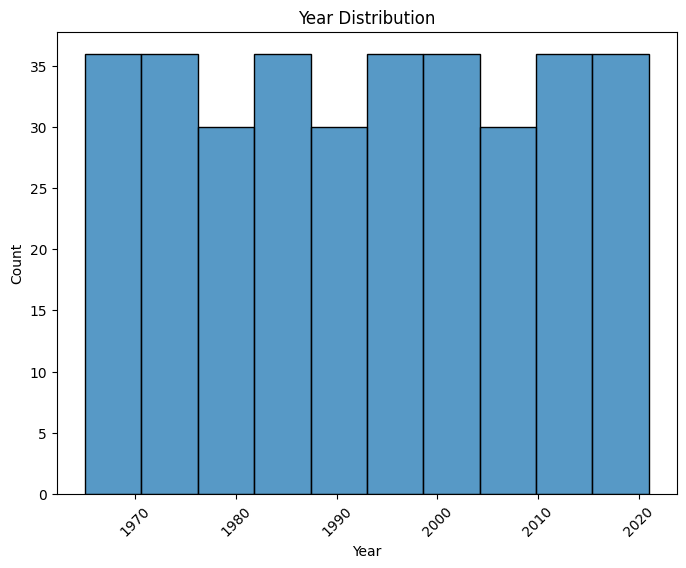

In [65]:
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

In [66]:
import numpy as np

# List of columns to apply log transformation to
columns_to_transform = ['Geo Biomass Other - TWh', 'Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh']

# Apply log transformation to each column
for col in columns_to_transform:
    df[col] = np.log(df[col] + 1)  # Add 1 to avoid log(0)

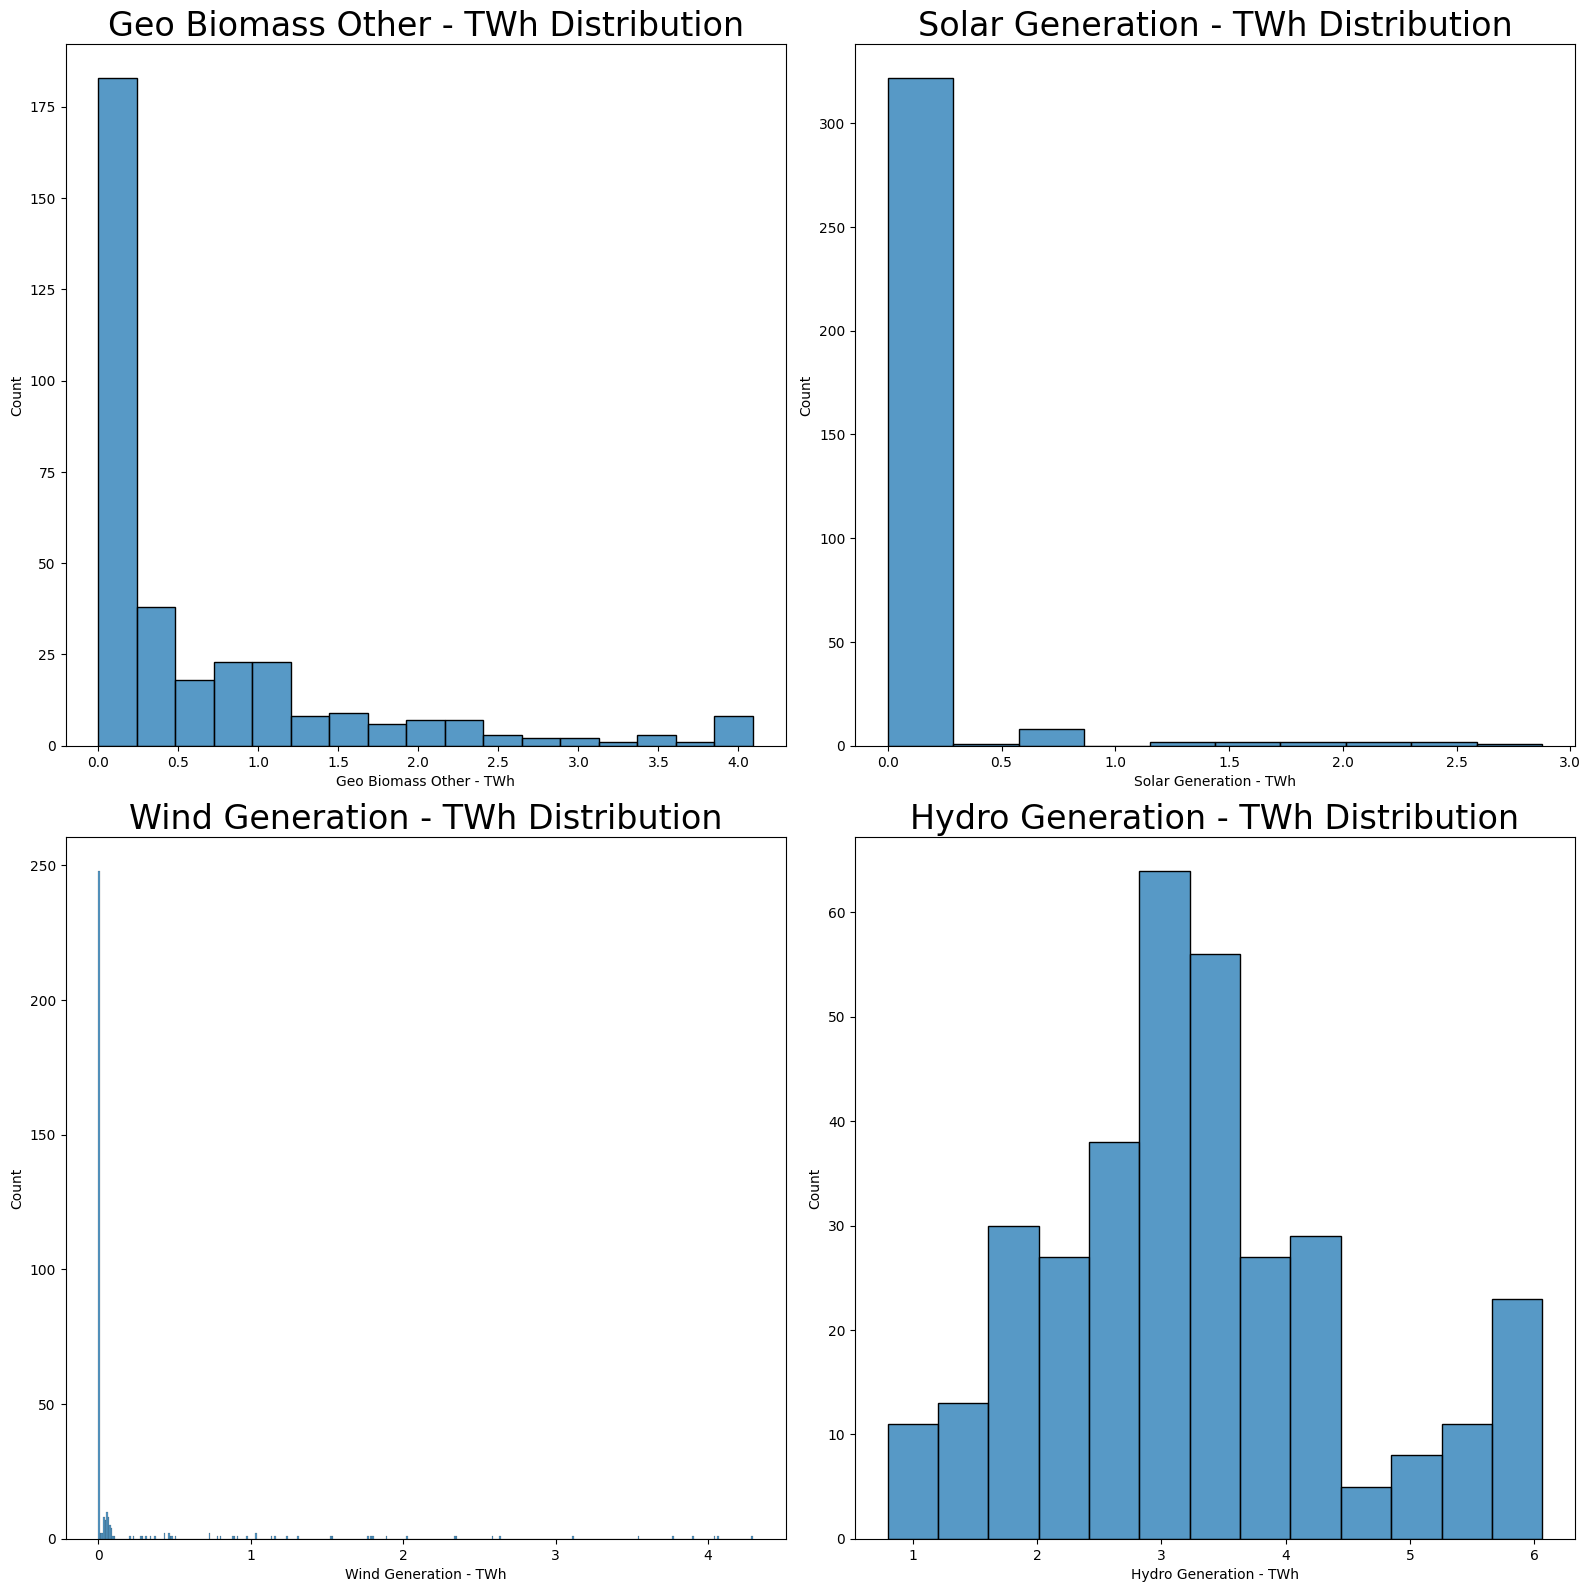

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns = ['Geo Biomass Other - TWh', 'Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh']
# Create a figure and axes for plotting with a larger size
plt.figure(figsize=(16, 16))  # Adjust this as necessary for even larger plots

# Loop through the columns and create histograms
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 4 rows, 4 columns grid (16 slots)
    sns.histplot(data=df, x=col)
    plt.title(f'{col} Distribution', fontsize=24)  # Increase title font size

# Adjust layout for better spacing between plots
plt.tight_layout(pad=1.0)  # Increase padding between subplots
plt.show()


In [68]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head(344)

,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Entity_Brazil,Entity_Chile,Entity_Colombia,Entity_Peru,Entity_Venezuela,Code_BRA,Code_CHL,Code_COL,Code_PER,Code_VEN
0,1965,0.000000,0.000000,0.000000,0.799809,False,False,False,False,False,False,False,False,False,False
1,1966,0.000000,0.000000,0.000000,0.806891,False,False,False,False,False,False,False,False,False,False
2,1967,0.000000,0.000000,0.000000,0.820087,False,False,False,False,False,False,False,False,False,False
3,1968,0.000000,0.000000,0.000000,0.915360,False,False,False,False,False,False,False,False,False,False
4,1969,0.000000,0.000000,0.000000,0.851541,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2017,0.016208,0.003952,0.090955,4.263179,False,False,False,False,True,False,False,False,False,True
338,2018,0.016208,0.003952,0.090955,4.080085,False,False,False,False,True,False,False,False,False,True
339,2019,0.045079,0.003075,0.080003,3.924678,False,False,False,False,True,False,False,False,False,True
340,2020,0.011039,0.003084,0.080213,4.131607,False,False,False,False,True,False,False,False,False,True


In [69]:
# Define X (features) and y (target)
X = df_encoded.drop('Solar Generation - TWh', axis=1)
y = df_encoded['Solar Generation - TWh']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error
import numpy as np


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [73]:
print(mse)
print(rmse)

0.055658531791083765
0.23592060484638422
